In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/suryamani/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [109]:
data = pd.read_csv("./email_campaigns.csv")

In [110]:
data

,email_type,subject,body,opened,meeting_link_clicked,responded
0,example1,propel marketing roi advanced analytics,hey recipient name ready see marketing perform...,0,0,0
1,example1,data superpower unlock insights us,hi recipient name reaching believe last messag...,1,0,0
2,example1,turn marketing data decisions let explore,greetings recipient name connected yet convinc...,0,0,0
3,example1,marketing success click away let chat analytics,hello recipient name clear serious business su...,1,0,1
4,example1,boost brand visibility proven marketing analyt...,hi recipient name digital age data power espec...,0,0,0
...,...,...,...,...,...,...
149,HRConsultingSeries,streamline hr boost performance,hello recipient name efficiency king especiall...,1,0,1
150,example1,boost brand visibility,hello recipient name want skyrocket company ma...,1,0,0
151,example1,outpace competitors insightful analytics,hi recipient name noticed navigating vast univ...,1,0,0
152,example1,tailored analytics,hey recipient name brand deserves stand custom...,0,0,0


In [111]:
data.shape

(154, 6)

### opened vs Non opened campaigns

<AxesSubplot:xlabel='opened', ylabel='count'>

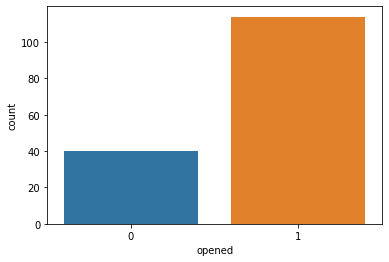

In [38]:
sns.countplot(x = data['opened'])

In [39]:
data['opened'].value_counts()

1    114
0     40
Name: opened, dtype: int64

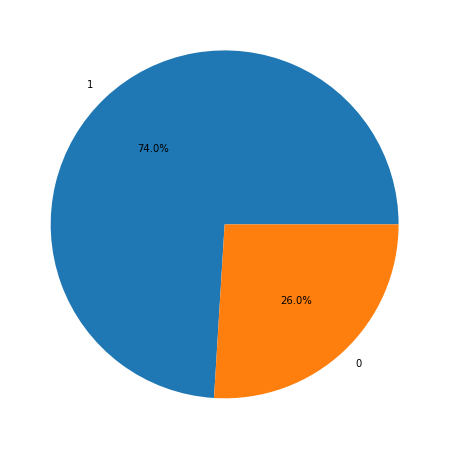

In [40]:
plt.subplots(1,figsize = (8,8))
plt.pie(data['opened'].value_counts(), labels=data['opened'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### 74% users have opened the Email campaigns

### meeting link clicked vs non clicked

<AxesSubplot:xlabel='meeting_link_clicked', ylabel='count'>

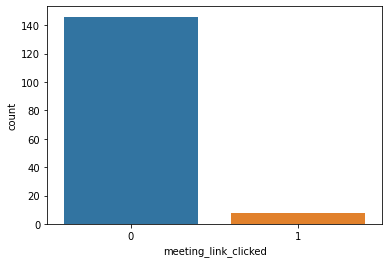

In [41]:
sns.countplot(x = data['meeting_link_clicked'])

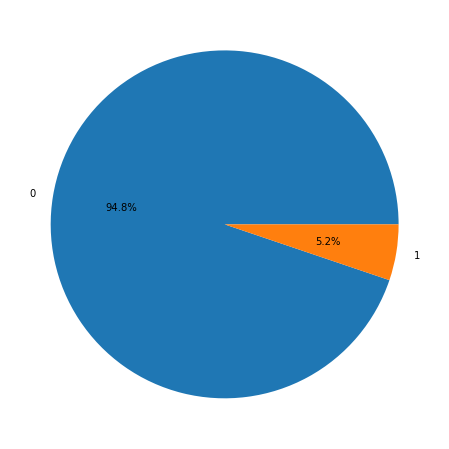

In [107]:
plt.subplots(1,figsize = (8,8))
plt.pie(data['meeting_link_clicked'].value_counts(), labels=data['meeting_link_clicked'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### 5.2% users have clicked the meeting link

### responded vs non responded

<AxesSubplot:xlabel='responded', ylabel='count'>

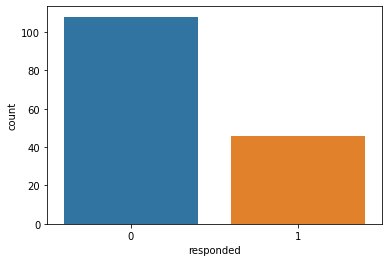

In [42]:
sns.countplot(x = data['responded'])

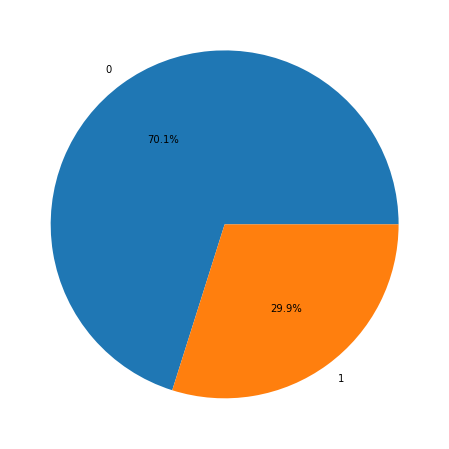

In [125]:
plt.subplots(1,figsize = (8,8))
plt.pie(data['responded'].value_counts(), labels=data['responded'].value_counts().index, autopct='%1.1f%%')
plt.show()

### marketing campaign type count

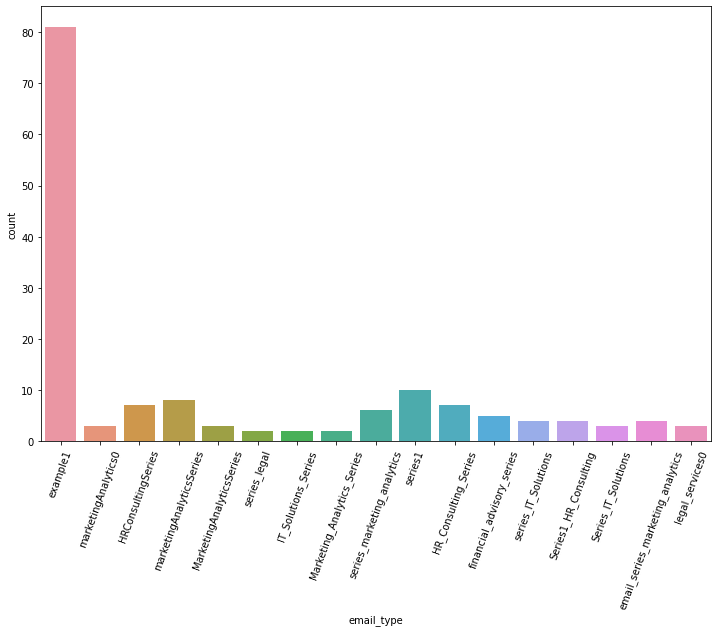

In [112]:
plt.subplots(1,figsize = (12,8))
sns.countplot(x = data['email_type'])
plt.xticks(rotation=70)
plt.show()

### Checking length of subject and body does that word count matters in clicking

In [114]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [115]:
data['subject_length'] = data['subject'].apply(word_count)
data['body_length'] = data['body'].apply(word_count)

##### Mean word length of subject and body

In [116]:
data['mean_word_length_subject'] = data['subject'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data['mean_word_length_body'] = data['body'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

##### Mean sentence length of subject and body

In [117]:
data['mean_sent_length_subject'] = data['subject'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data['mean_sent_length_body'] = data['body'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

##### looks like 35 is the average string length in subject

<AxesSubplot:>

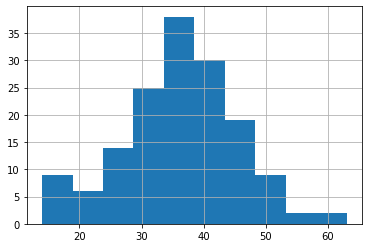

In [118]:
data['subject'].str.len().hist()

##### The mean length of body is somewhere around 220

<AxesSubplot:>

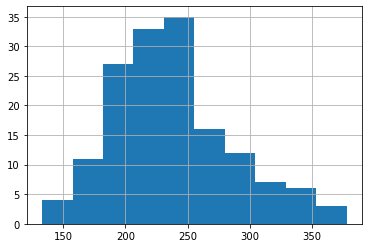

In [119]:
data['body'].str.len().hist()

<AxesSubplot:xlabel='mean_word_length_subject', ylabel='Density'>

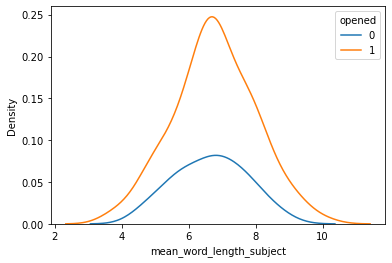

In [120]:
sns.kdeplot(data['mean_word_length_subject'],hue= data['opened'])

##### Chances of openeing an email is higher When the mean word length is 7

<AxesSubplot:xlabel='mean_sent_length_body', ylabel='Density'>

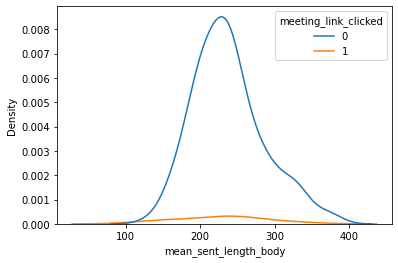

In [123]:
sns.kdeplot(data['mean_sent_length_body'],hue= data['meeting_link_clicked'])

In [64]:
data

,email_type,subject,body,opened,meeting_link_clicked,responded,subject_length,body_length,mean_word_length_subject,mean_word_length_body,mean_sent_length_subject,mean_sent_length_body
0,8,propel marketing roi advanced analytics,hey recipient name ready see marketing perform...,0,0,0,5,35,7.000000,6.114286,39.0,248.0
1,8,data superpower unlock insights us,hi recipient name reaching believe last messag...,1,0,0,5,34,6.000000,6.617647,34.0,258.0
2,8,turn marketing data decisions let explore,greetings recipient name connected yet convinc...,0,0,0,6,44,6.000000,6.477273,41.0,328.0
3,8,marketing success click away let chat analytics,hello recipient name clear serious business su...,1,0,1,7,36,5.857143,6.055556,47.0,253.0
4,8,boost brand visibility proven marketing analyt...,hi recipient name digital age data power espec...,0,0,0,7,41,7.714286,6.414634,60.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,streamline hr boost performance,hello recipient name efficiency king especiall...,1,0,1,4,26,7.000000,6.461538,31.0,193.0
150,8,boost brand visibility,hello recipient name want skyrocket company ma...,1,0,0,3,27,6.666667,6.111111,22.0,191.0
151,8,outpace competitors insightful analytics,hi recipient name noticed navigating vast univ...,1,0,0,4,25,9.250000,5.960000,40.0,173.0
152,8,tailored analytics,hey recipient name brand deserves stand custom...,0,0,0,2,31,8.500000,6.161290,18.0,221.0


### Top 40 Most common words in subject

In [73]:
stop = set(stopwords.words('english'))

In [69]:
subject_data = data['subject'].str.split()
subject_data = subject_data.values.tolist()

corpus = [word for i in subject_data for word in i]

counter = Counter(corpus)
most = counter.most_common()

In [75]:
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

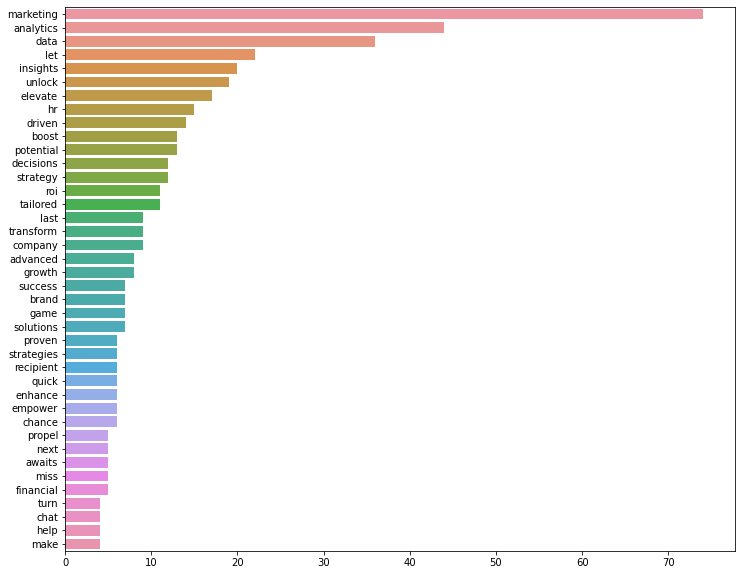

In [77]:
plt.subplots(1,figsize = (12,10))
sns.barplot(x=y,y=x)
plt.show()

### Top 40 Most common words in body

In [82]:
body_data = data['body'].str.split()
body_data = body_data.values.tolist()

corpus = [word for i in body_data for word in i]

counter = Counter(corpus)
most = counter.most_common()

In [83]:
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

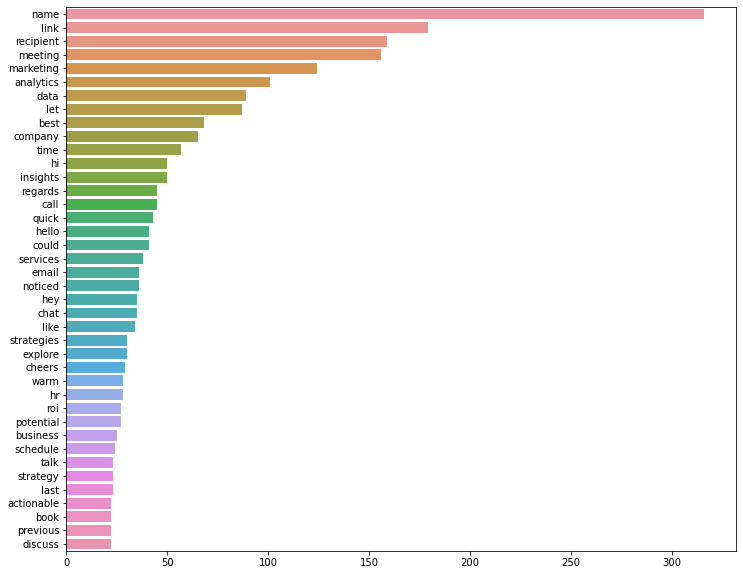

In [84]:
plt.subplots(1,figsize = (12,10))
sns.barplot(x=y,y=x)
plt.show()

### Top N-grams words

In [92]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [93]:
top_n_bigrams = get_top_ngram(data['subject'],2)[:10]

<AxesSubplot:>

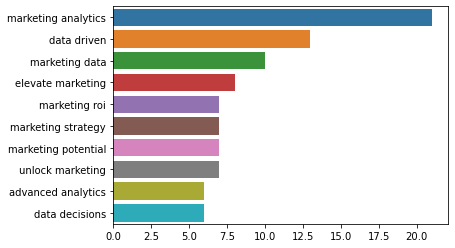

In [95]:
x,y = map(list,zip(*top_n_bigrams))

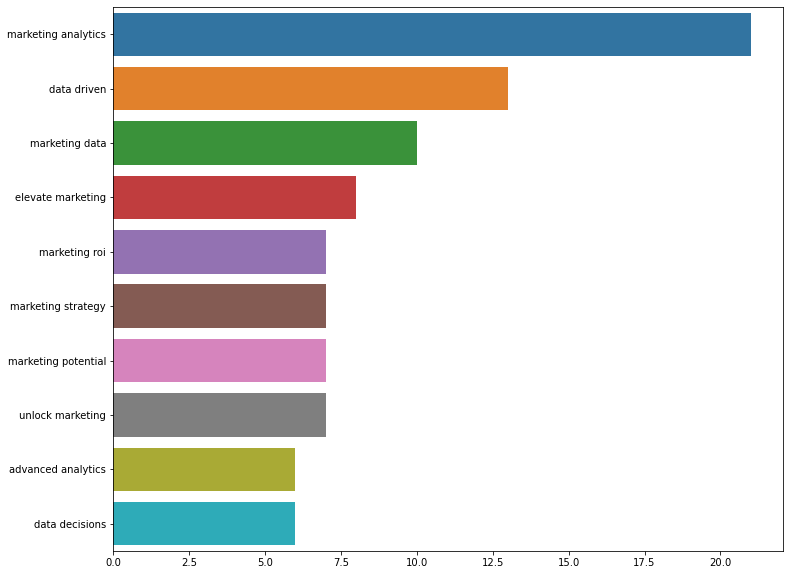

In [96]:
plt.subplots(1,figsize = (12,10))
sns.barplot(x=y,y=x)
plt.show()

### Top 10 words in Subject that leads to opening of email

In [98]:
subject_data = data[data['opened'] == 1]['subject'].str.split()
subject_data = subject_data.values.tolist()

corpus = [word for i in subject_data for word in i]

counter = Counter(corpus)
most = counter.most_common()

In [101]:
x, y= [], []
for word,count in most[:10]:
    if (word not in stop):
        x.append(word)
        y.append(count)

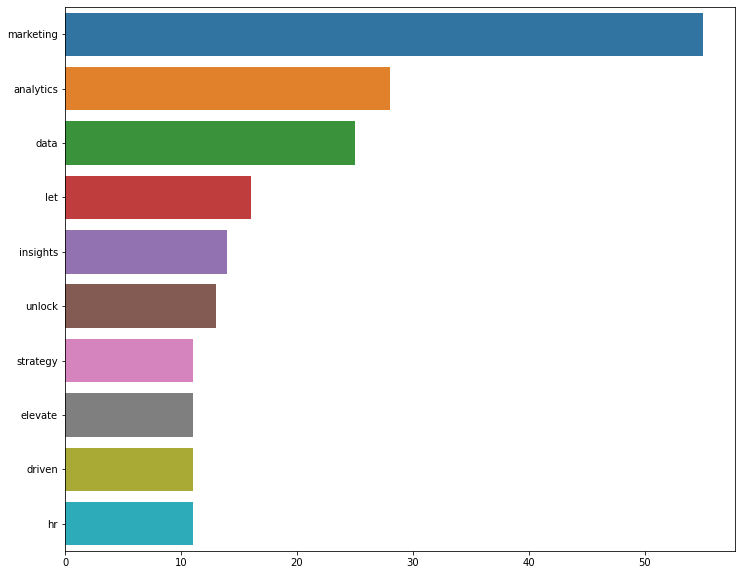

In [102]:
plt.subplots(1,figsize = (12,10))
sns.barplot(x=y,y=x)
plt.show()

### Top 10 words in body that leads to clicking of meeting link

In [104]:
body_data = data[data['meeting_link_clicked'] == 1]['body'].str.split()
body_data = body_data.values.tolist()

corpus = [word for i in body_data for word in i]

counter = Counter(corpus)
most = counter.most_common()

In [105]:
x, y= [], []
for word,count in most[:10]:
    if (word not in stop):
        x.append(word)
        y.append(count)

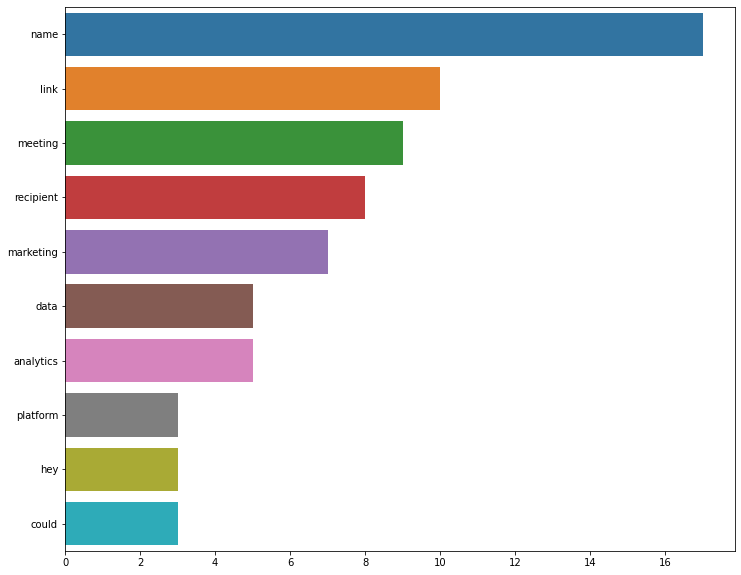

In [106]:
plt.subplots(1,figsize = (12,10))
sns.barplot(x=y,y=x)
plt.show()

### Observations:
1. In the data we have 74% users who have opened the Email campaigns.
2. Out of those 74% users only 5% of users have clicked the meeting link appeared in the campaign.
3. And Out of those 74% users 30% of them actually responded back thats a good amount of conversion.(Can we make it better?)
4. marketting, Analytics and Data are the frequently occuring words.
5. Data is quite skewed for open as well as click so precision and recall will be a good metrics here.

In [127]:
data.to_csv("./data.csv",index=False)